In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as spst
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv("high_diamond_ranked_10min.csv")
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
data.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


In [7]:
data["blueWins"].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [8]:
data["blueFirstBlood"].value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

In [9]:
data["blueDragons"].value_counts()

0    6303
1    3576
Name: blueDragons, dtype: int64

In [10]:
data["blueHeralds"].value_counts()

0    8022
1    1857
Name: blueHeralds, dtype: int64

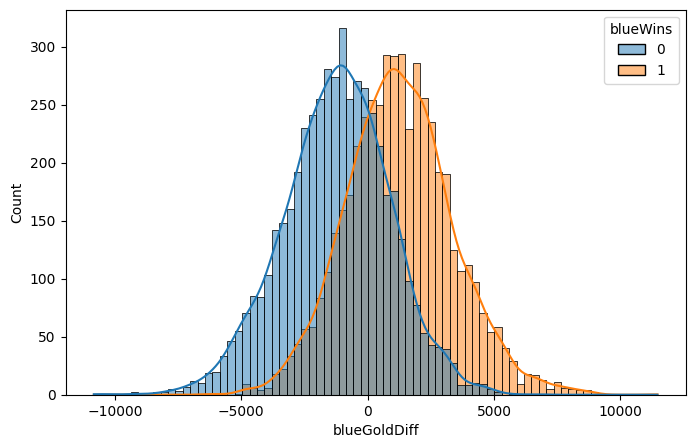

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(x=data['blueGoldDiff'],kde=True, hue = data['blueWins'])
plt.show()

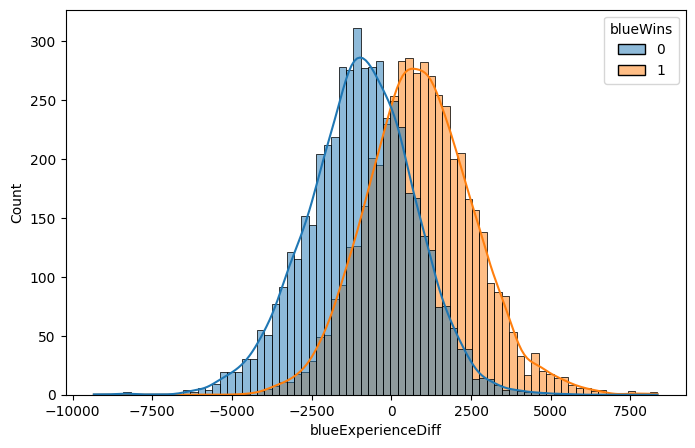

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(x=data['blueExperienceDiff'],kde=True, hue = data['blueWins'])
plt.show()

In [13]:
table = pd.crosstab(data['blueWins'], data['blueFirstBlood'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=401.3756384137523, pvalue=2.7636098571500442e-89, dof=1, expected_freq=array([[2450.7043223, 2498.2956777],
       [2441.2956777, 2488.7043223]]))

In [14]:
model=sm.Logit(data['blueWins'], data['blueGoldDiff'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.539209
         Iterations 5
blueGoldDiff    0.0
dtype: float64


In [15]:
model=sm.Logit(data['blueWins'], data['blueExperienceDiff'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.554003
         Iterations 5
blueExperienceDiff    0.0
dtype: float64


In [16]:
model=sm.Logit(data['blueWins'], data['blueKills'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.682425
         Iterations 4
blueKills    4.442583e-47
dtype: float64


In [17]:
data.loc[:,["blueGoldDiff",'redGoldDiff']]

,blueGoldDiff,redGoldDiff
0,643,-643
1,-2908,2908
2,-1172,1172
3,-1321,1321
4,-1004,1004
...,...,...
9874,2519,-2519
9875,782,-782
9876,-2416,2416
9877,-839,839


In [18]:
dropcol = ['gameId','redFirstBlood','redGoldDiff','redKills','redDeaths','redDragons','redHeralds','redExperienceDiff']
data2 = data.drop(dropcol,axis=1)

In [19]:
x = data2.drop('blueWins',axis=1)
y = data2[['blueWins']]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [21]:
x_train.shape, x_test.shape

((7903, 31), (1976, 31))

In [22]:
firstb = x_train[["blueFirstBlood", 'blueDragons', 'blueHeralds']]
firstb_test = x_test[["blueFirstBlood", 'blueDragons', 'blueHeralds']]

x_train_ = x_train.drop(["blueFirstBlood", 'blueDragons', 'blueHeralds'],axis=1)
x_test_ = x_test.drop(["blueFirstBlood", 'blueDragons', 'blueHeralds'],axis=1)

scaler = StandardScaler()
scaler.fit(x_train_)
x_train = scaler.transform(x_train_)
x_test = scaler.transform(x_test_)

x_train = pd.DataFrame(x_train,index=x_train_.index,columns=x_train_.columns)
x_test = pd.DataFrame(x_test,index=x_test_.index,columns=x_test_.columns)

x_train_s = pd.concat([x_train,firstb],axis=1)
x_test_s = pd.concat([x_test,firstb_test],axis=1)

x_train_s.shape, x_test_s.shape

((7903, 31), (1976, 31))

In [23]:
model = RandomForestClassifier()
model.fit(x_train_s,y_train)
y_pred = model.predict(x_test_s)

<ipython-input-23-4b332ac6ae5c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_s,y_train)


In [24]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7145748987854251
0.7107692307692308
[[719 271]
 [293 693]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       990
           1       0.72      0.70      0.71       986

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



In [26]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)


    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]


    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

,feature_name,feature_importance
0,blueGoldDiff,0.108363
1,blueExperienceDiff,0.089935
2,blueGoldPerMin,0.061852
3,redGoldPerMin,0.061690
4,redTotalGold,0.059668
5,blueTotalGold,0.055873
6,blueTotalExperience,0.052804
7,redTotalExperience,0.051873
8,redCSPerMin,0.032320
9,redTotalMinionsKilled,0.032189


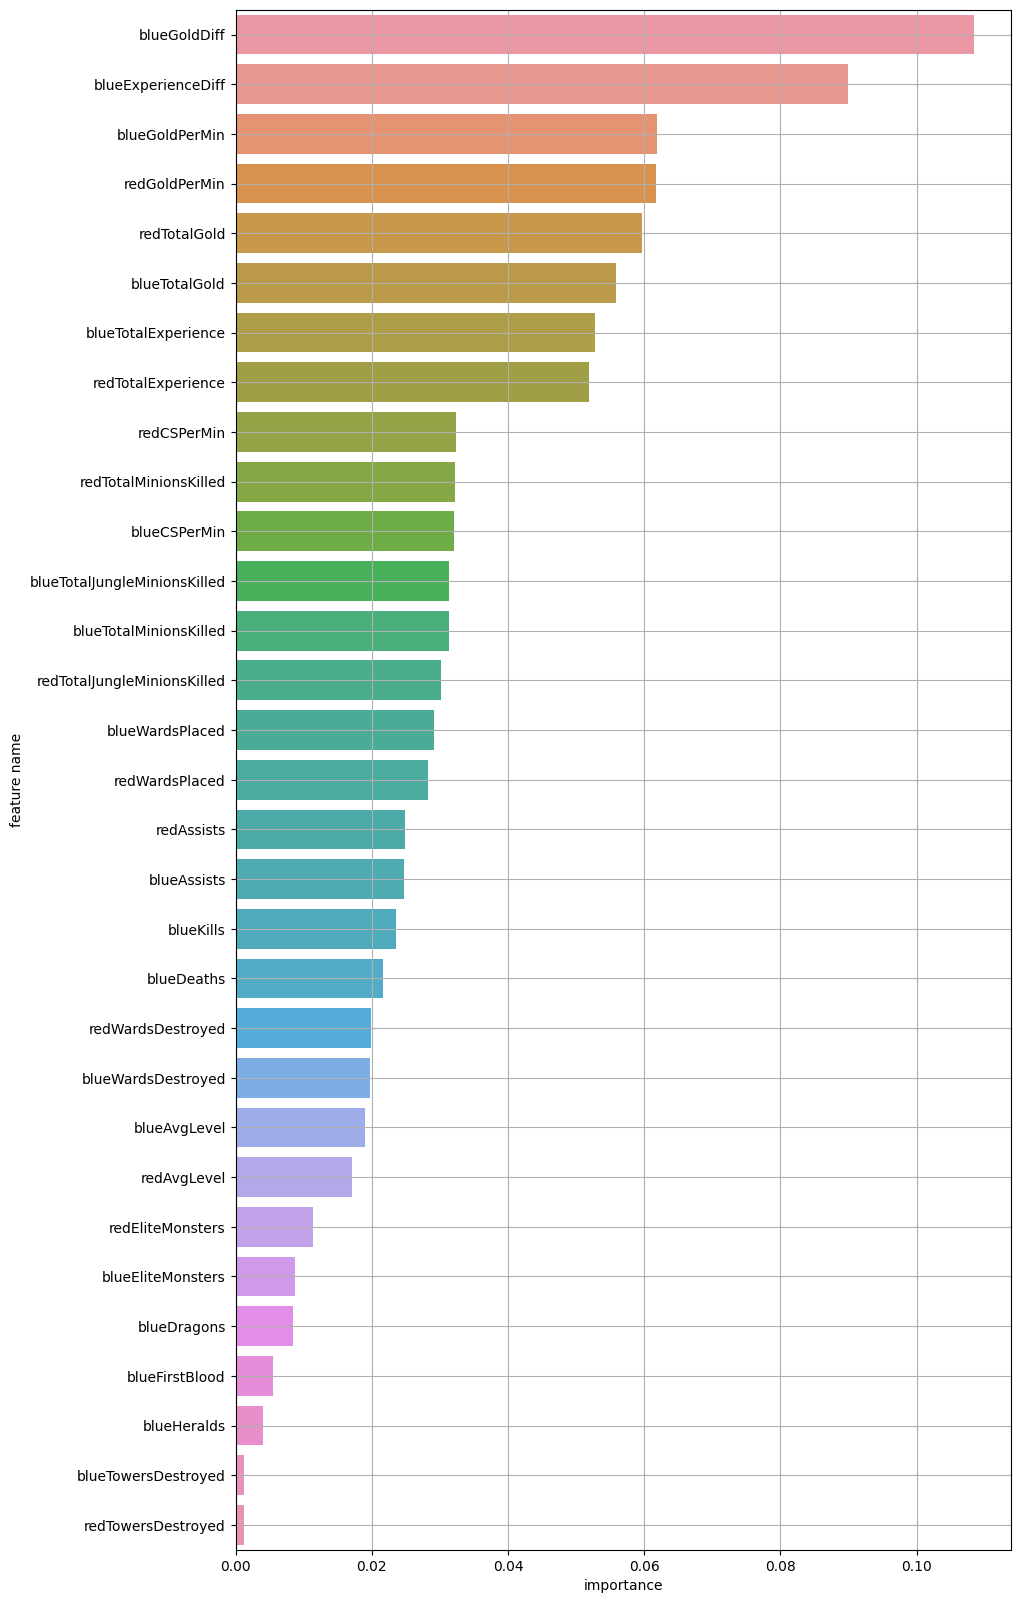

In [27]:
plot_feature_importance(model.feature_importances_,x_train_s.columns,result_only = False)

In [29]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.9 MB/s eta 0:00:00


In [30]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier()
model_cat.fit(x_train_s,y_train)
y_pred_cat = model_cat.predict(x_test_s)

Learning rate set to 0.024905
0:	learn: 0.6853729	total: 54.3ms	remaining: 54.3s
1:	learn: 0.6780916	total: 60ms	remaining: 30s
2:	learn: 0.6707605	total: 65.5ms	remaining: 21.8s
3:	learn: 0.6640373	total: 71.3ms	remaining: 17.8s
4:	learn: 0.6580343	total: 77.1ms	remaining: 15.4s
5:	learn: 0.6518894	total: 82.7ms	remaining: 13.7s
6:	learn: 0.6466257	total: 88.3ms	remaining: 12.5s
7:	learn: 0.6411573	total: 96ms	remaining: 11.9s
8:	learn: 0.6358538	total: 102ms	remaining: 11.2s
9:	learn: 0.6310031	total: 108ms	remaining: 10.7s
10:	learn: 0.6258067	total: 114ms	remaining: 10.2s
11:	learn: 0.6214538	total: 119ms	remaining: 9.83s
12:	learn: 0.6168962	total: 125ms	remaining: 9.5s
13:	learn: 0.6127773	total: 131ms	remaining: 9.21s
14:	learn: 0.6088759	total: 141ms	remaining: 9.23s
15:	learn: 0.6052882	total: 154ms	remaining: 9.46s
16:	learn: 0.6017181	total: 159ms	remaining: 9.22s
17:	learn: 0.5984417	total: 165ms	remaining: 9s
18:	learn: 0.5952835	total: 171ms	remaining: 8.81s
19:	learn: 0.

,feature_name,feature_importance
0,blueGoldDiff,11.406720
1,blueExperienceDiff,6.590898
2,redTotalExperience,6.206997
3,blueTotalExperience,5.429906
4,blueTotalJungleMinionsKilled,5.291999
5,redTotalJungleMinionsKilled,5.243430
6,blueGoldPerMin,4.167748
7,redWardsPlaced,3.958034
8,blueWardsPlaced,3.603288
9,redTotalMinionsKilled,3.574571


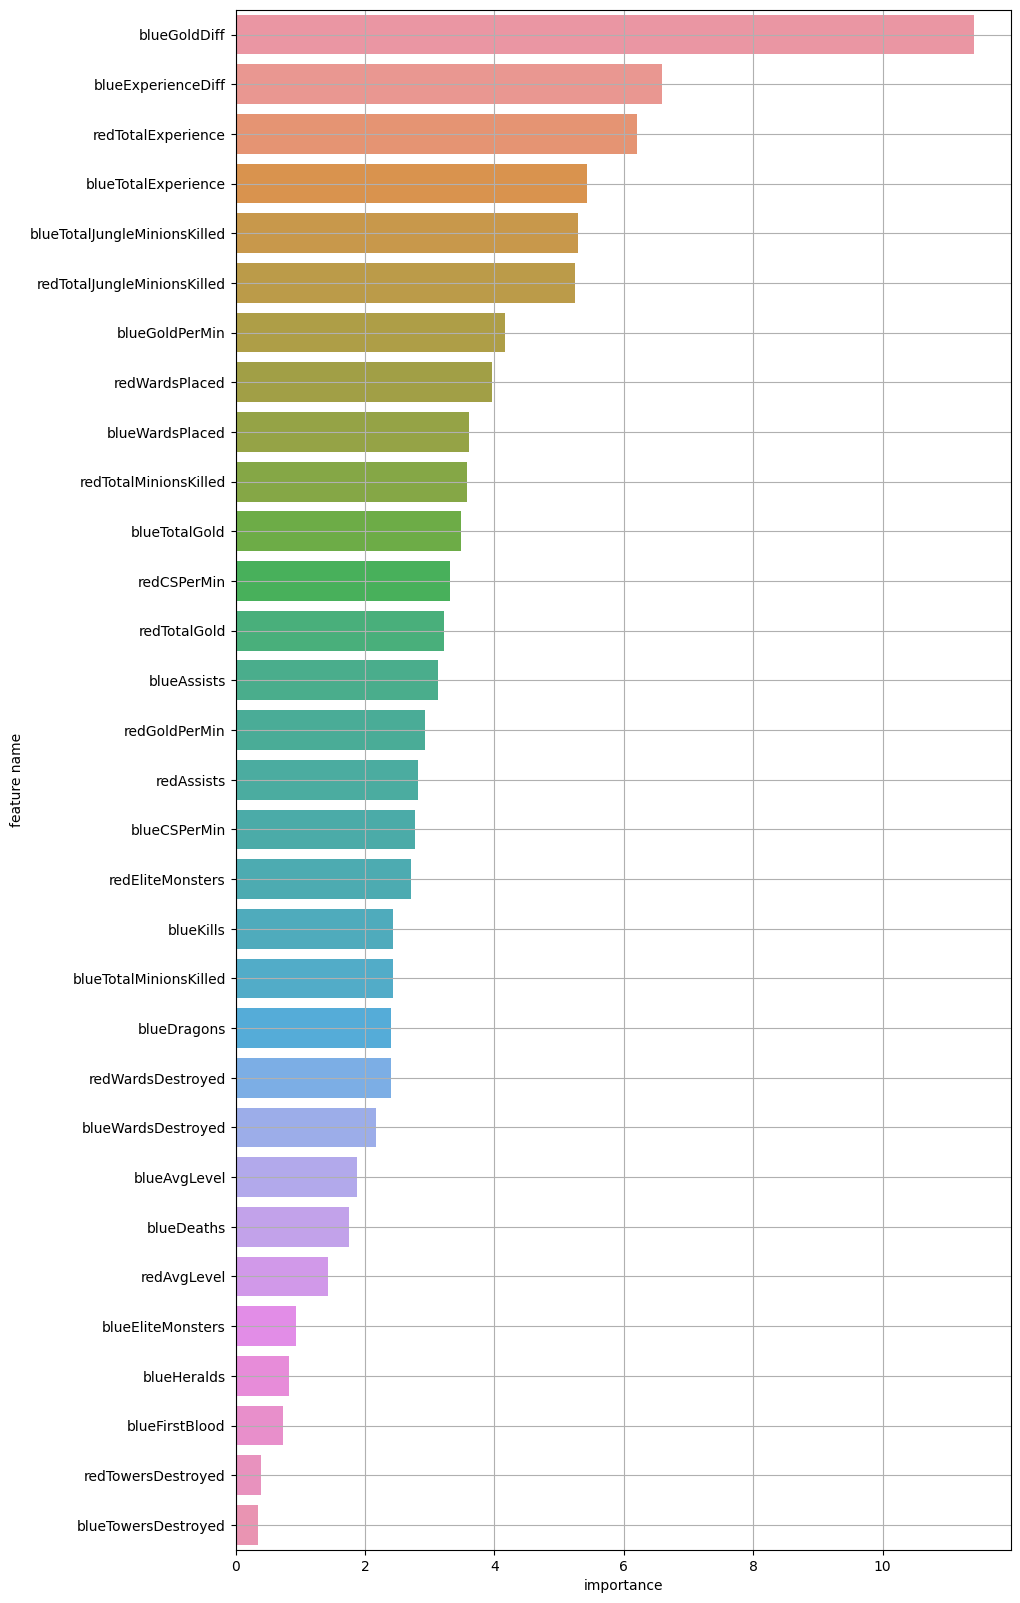

In [31]:
plot_feature_importance(model_cat.feature_importances_,x_train_s.columns,result_only = False)

In [32]:
x_train_bl = x_train_s[['blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
 'blueEliteMonsters','blueTowersDestroyed','blueTotalGold','blueAvgLevel','blueTotalExperience','blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled','blueGoldDiff','blueExperienceDiff','blueCSPerMin','blueGoldPerMin','blueFirstBlood','blueDragons','blueHeralds']]

x_train_rd = x_train_s[['redWardsPlaced','redWardsDestroyed',
 'redAssists',
 'redEliteMonsters',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redCSPerMin',
 'redGoldPerMin']]

x_test_bl = x_test_s[['blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
 'blueEliteMonsters','blueTowersDestroyed','blueTotalGold','blueAvgLevel','blueTotalExperience','blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled','blueGoldDiff','blueExperienceDiff','blueCSPerMin','blueGoldPerMin','blueFirstBlood','blueDragons','blueHeralds']]

x_test_rd = x_test_s[['redWardsPlaced','redWardsDestroyed',
 'redAssists',
 'redEliteMonsters',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redCSPerMin',
 'redGoldPerMin']]

In [33]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(19,))
il2 = keras.layers.Input(shape=(12,))

hl = keras.layers.Dense(64,activation='relu')(il)
bl = keras.layers.BatchNormalization()(hl)
hl2 = keras.layers.Dense(64,activation='relu')(il2)
bl2 = keras.layers.BatchNormalization()(hl2)

hl = keras.layers.Concatenate()([bl,bl2])
bl = keras.layers.BatchNormalization()(hl)
dl = keras.layers.Dropout(0.2)(bl)

hl = keras.layers.Dense(32,activation='relu')(dl)
bl = keras.layers.BatchNormalization()(hl)
dl = keras.layers.Dropout(0.2)(bl)

ol = keras.layers.Dense(1,activation='sigmoid')(dl)

model = keras.models.Model([il,il2],ol)
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 19)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   1280      ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   832       ['input_2[0][0]']             
                                                                                              

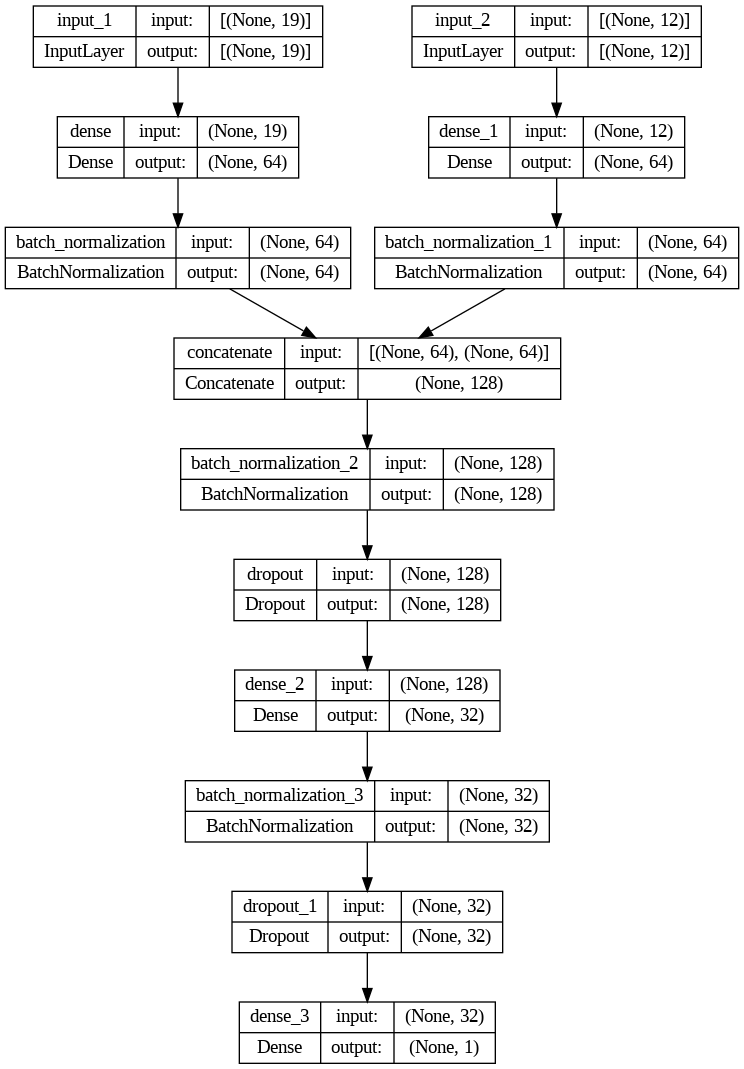

In [34]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [35]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   verbose=1,
                   patience = 16,
                   restore_best_weights = True)
rl = ReduceLROnPlateau(monitor="val_loss",
                       patience=7,
                       factor=0.25,
                       verbose=1,
                       min_lr=0.0000001)
history = model.fit([x_train_bl,x_train_rd],y_train,callbacks=[es,rl],epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
198/198 [==============================] - 7s 15ms/step - loss: 0.6217 - accuracy: 0.6780 - val_loss: 0.5454 - val_accuracy: 0.7274 - lr: 0.0010
Epoch 2/100
198/198 [==============================] - 2s 8ms/step - loss: 0.5666 - accuracy: 0.7169 - val_loss: 0.5379 - val_accuracy: 0.7204 - lr: 0.0010
Epoch 3/100
198/198 [==============================] - 2s 12ms/step - loss: 0.5552 - accuracy: 0.7268 - val_loss: 0.5372 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 4/100
198/198 [==============================] - 2s 8ms/step - loss: 0.5446 - accuracy: 0.7249 - val_loss: 0.5357 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 5/100
198/198 [==============================] - 2s 9ms/step - loss: 0.5422 - accuracy: 0.7294 - val_loss: 0.5347 - val_accuracy: 0.7274 - lr: 0.0010
Epoch 6/100
198/198 [==============================] - 2s 8ms/step - loss: 0.5349 - accuracy: 0.7365 - val_loss: 0.5353 - val_accuracy: 0.7274 - lr: 0.0010
Epoch 7/100
198/198 [==============================] - 2s 10ms

In [36]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(19,))
il2 = keras.layers.Input(shape=(12,))

hl = keras.layers.Dense(64,activation='relu')(il)
bl = keras.layers.BatchNormalization()(hl)
hl2 = keras.layers.Dense(64,activation='relu')(il2)
bl2 = keras.layers.BatchNormalization()(hl2)

hl = keras.layers.Dense(32,activation='relu')(bl)
bl = keras.layers.BatchNormalization()(hl)
dl = keras.layers.Dropout(0.2)(bl)
hl2 = keras.layers.Dense(32,activation='relu')(bl2)
bl2 = keras.layers.BatchNormalization()(hl2)
dl2 = keras.layers.Dropout(0.2)(bl2)

hl = keras.layers.Dense(16,activation='relu')(dl)
bl = keras.layers.BatchNormalization()(hl)
hl2 = keras.layers.Dense(16,activation='relu')(dl2)
bl2 = keras.layers.BatchNormalization()(hl2)

hl = keras.layers.Dense(8,activation='relu')(bl)
bl = keras.layers.BatchNormalization()(hl)
hl2 = keras.layers.Dense(8,activation='relu')(bl2)
bl2 = keras.layers.BatchNormalization()(hl2)

hl = keras.layers.Concatenate()([bl,bl2])
bl = keras.layers.BatchNormalization()(hl)
dl = keras.layers.Dropout(0.2)(bl)

ol = keras.layers.Dense(1,activation='sigmoid')(dl)

model = keras.models.Model([il,il2],ol)
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 19)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   1280      ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   832       ['input_2[0][0]']             
                                                                                              

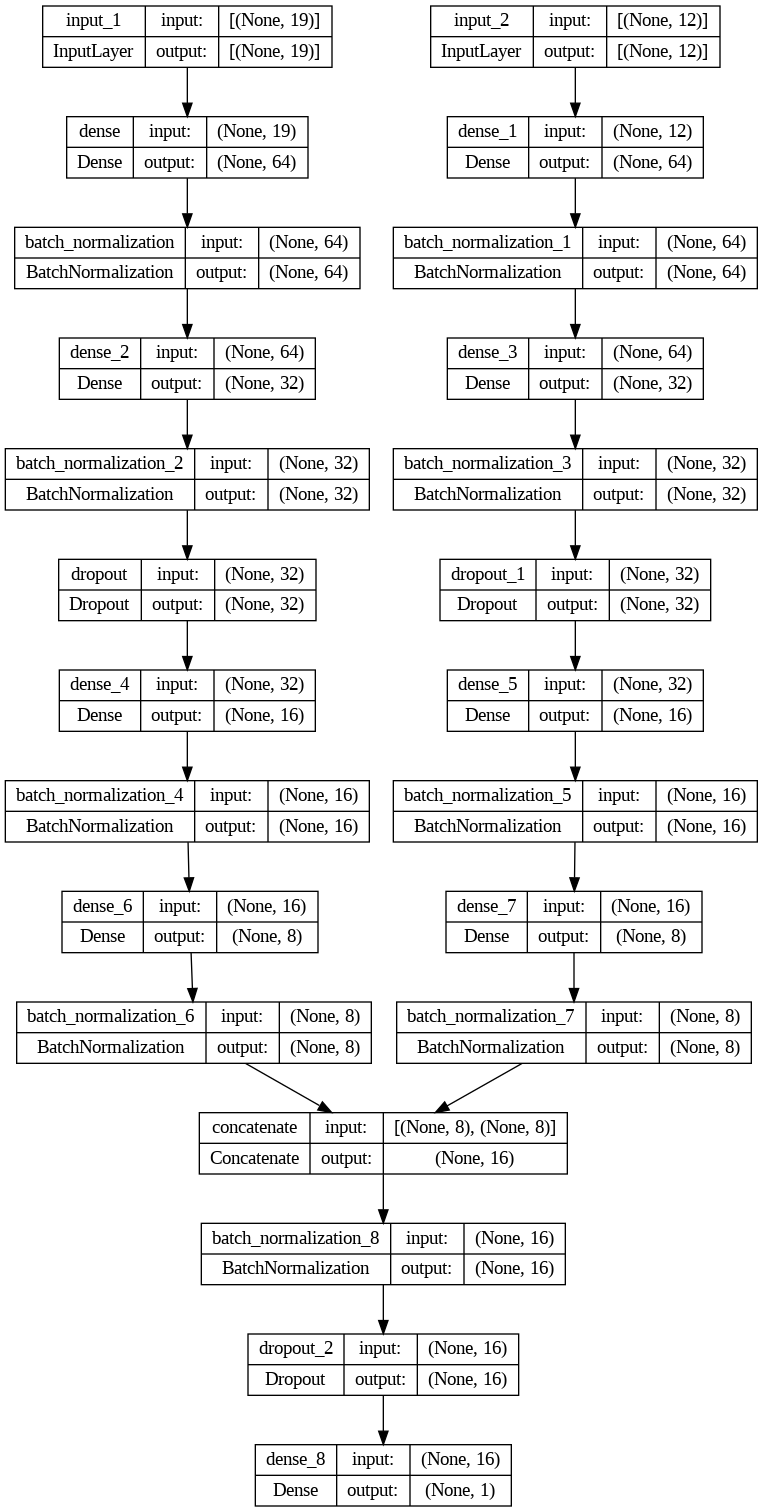

In [37]:
plot_model(model,show_shapes=True)

In [38]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   verbose=1,
                   patience = 16,
                   restore_best_weights = True)
rl = ReduceLROnPlateau(monitor="val_loss",
                       patience=7,
                       factor=0.25,
                       verbose=1,
                       min_lr=0.0000001)
history = model.fit([x_train_bl,x_train_rd],y_train,callbacks=[es,rl],epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
198/198 [==============================] - 21s 23ms/step - loss: 0.6470 - accuracy: 0.6624 - val_loss: 0.5487 - val_accuracy: 0.7128 - lr: 0.0010
Epoch 2/100
198/198 [==============================] - 3s 14ms/step - loss: 0.5792 - accuracy: 0.6942 - val_loss: 0.5446 - val_accuracy: 0.7116 - lr: 0.0010
Epoch 3/100
198/198 [==============================] - 2s 11ms/step - loss: 0.5650 - accuracy: 0.7085 - val_loss: 0.5441 - val_accuracy: 0.7217 - lr: 0.0010
Epoch 4/100
198/198 [==============================] - 3s 14ms/step - loss: 0.5572 - accuracy: 0.7159 - val_loss: 0.5374 - val_accuracy: 0.7198 - lr: 0.0010
Epoch 5/100
198/198 [==============================] - 3s 14ms/step - loss: 0.5470 - accuracy: 0.7262 - val_loss: 0.5370 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 6/100
198/198 [==============================] - 4s 19ms/step - loss: 0.5456 - accuracy: 0.7232 - val_loss: 0.5347 - val_accuracy: 0.7230 - lr: 0.0010
Epoch 7/100
198/198 [==============================] - 1s

In [39]:
y_pred_ = np.where(y_pred>=0.5,1,0)
print(accuracy_score(y_test,y_pred_))
print(f1_score(y_test,y_pred_))
print(confusion_matrix(y_test,y_pred_))

0.7145748987854251
0.7107692307692308
[[719 271]
 [293 693]]


In [40]:
from sklearn.linear_model import LogisticRegression
model_lo = LogisticRegression()
model_lo.fit(x_train_s,y_train)
y_pred_lo = model_lo.predict(x_test_s)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(accuracy_score(y_test,y_pred_lo))
print(f1_score(y_test,y_pred_lo))
print(confusion_matrix(y_test,y_pred_lo))

0.7191295546558705
0.7201210287443269
[[707 283]
 [272 714]]


In [42]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(31,))
hl = keras.layers.Dense(128,activation='relu')(il)
bl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dense(128,activation='relu')(bl)
bl = keras.layers.BatchNormalization()(hl)

hl = keras.layers.Dense(64,activation='relu')(bl)
bl = keras.layers.BatchNormalization()(hl)
dl = keras.layers.Dropout(0.2)(bl)
hl2 = keras.layers.Dense(64,activation='relu')(dl)
bl2 = keras.layers.BatchNormalization()(hl2)
dl2 = keras.layers.Dropout(0.2)(bl2)

hl = keras.layers.Dense(32,activation='relu')(dl2)
bl = keras.layers.BatchNormalization()(hl)
hl2 = keras.layers.Dense(32,activation='relu')(bl)
bl2 = keras.layers.BatchNormalization()(hl2)

hl = keras.layers.Dense(16,activation='relu')(bl2)
bl = keras.layers.BatchNormalization()(hl)
hl2 = keras.layers.Dense(16,activation='relu')(bl)
bl2 = keras.layers.BatchNormalization()(hl2)

ol = keras.layers.Dense(1,activation='sigmoid')(bl2)

model = keras.models.Model(il,ol)
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense (Dense)               (None, 128)               4096      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256  

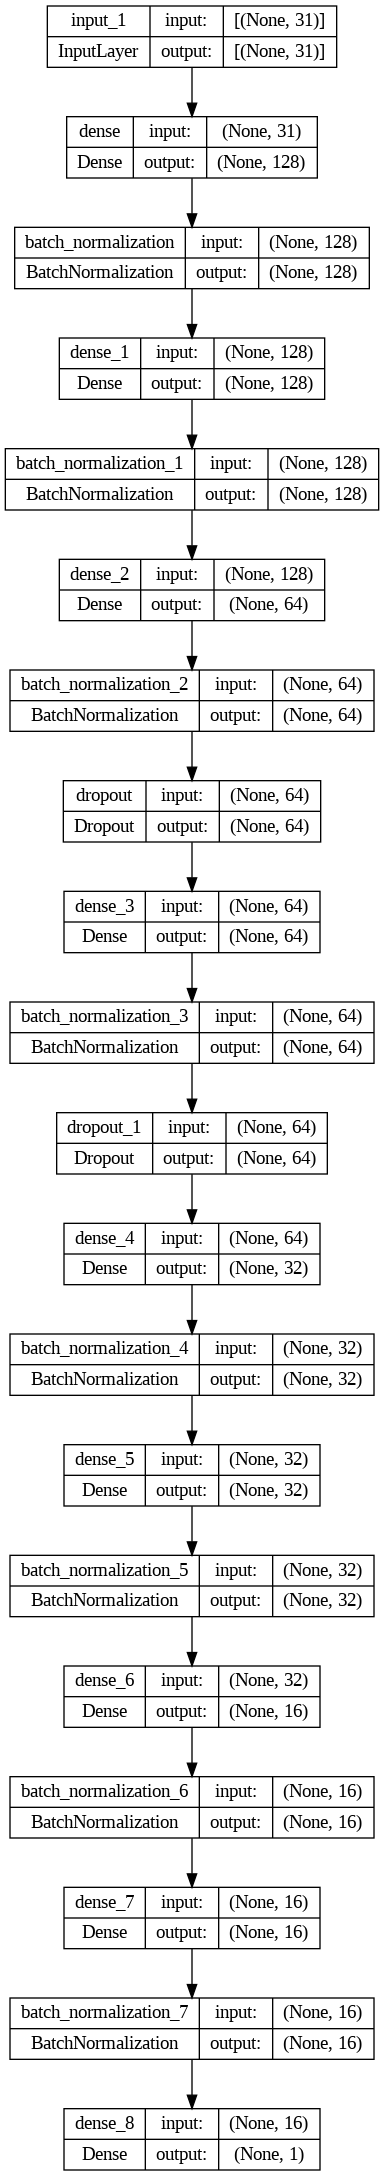

In [43]:
plot_model(model,show_shapes=True)

In [44]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   verbose=1,
                   patience = 16,
                   restore_best_weights = True)
rl = ReduceLROnPlateau(monitor="val_loss",
                       patience=7,
                       factor=0.25,
                       verbose=1,
                       min_lr=0.0000001)
history = model.fit(x_train_s,y_train,callbacks=[es,rl],epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
198/198 [==============================] - 7s 12ms/step - loss: 0.6378 - accuracy: 0.6405 - val_loss: 0.5698 - val_accuracy: 0.7090 - lr: 0.0010
Epoch 2/100
198/198 [==============================] - 1s 6ms/step - loss: 0.5684 - accuracy: 0.7069 - val_loss: 0.5404 - val_accuracy: 0.7128 - lr: 0.0010
Epoch 3/100
198/198 [==============================] - 1s 5ms/step - loss: 0.5544 - accuracy: 0.7154 - val_loss: 0.5422 - val_accuracy: 0.7141 - lr: 0.0010
Epoch 4/100
198/198 [==============================] - 1s 7ms/step - loss: 0.5478 - accuracy: 0.7203 - val_loss: 0.5453 - val_accuracy: 0.7084 - lr: 0.0010
Epoch 5/100
198/198 [==============================] - 1s 7ms/step - loss: 0.5448 - accuracy: 0.7309 - val_loss: 0.5420 - val_accuracy: 0.7185 - lr: 0.0010
Epoch 6/100
198/198 [==============================] - 1s 6ms/step - loss: 0.5423 - accuracy: 0.7276 - val_loss: 0.5425 - val_accuracy: 0.7268 - lr: 0.0010
Epoch 7/100
198/198 [==============================] - 1s 6ms/s

In [46]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [47]:
from sklearn.metrics import log_loss
import random
import optuna
from optuna.samplers import TPESampler

In [48]:
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.1, 10),
      "n_estimators":trial.suggest_int("n_estimators", 100, 1000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 50, 250),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2)

  firstb = x_train[["blueFirstBlood", 'blueDragons', 'blueHeralds']]
  firstb_test = x_valid[["blueFirstBlood", 'blueDragons', 'blueHeralds']]

  x_train_ = x_train.drop(["blueFirstBlood", 'blueDragons', 'blueHeralds'],axis=1)
  x_valid_ = x_valid.drop(["blueFirstBlood", 'blueDragons', 'blueHeralds'],axis=1)

  scaler = StandardScaler()
  scaler.fit(x_train_)
  x_train = scaler.transform(x_train_)
  x_valid = scaler.transform(x_valid_)

  x_train = pd.DataFrame(x_train,index=x_train_.index,columns=x_train_.columns)
  x_valid = pd.DataFrame(x_valid,index=x_valid_.index,columns=x_valid_.columns)

  x_train = pd.concat([x_train,firstb],axis=1)
  x_valid = pd.concat([x_valid,firstb_test],axis=1)

  cat = CatBoostClassifier(**param)
  cat.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_valid,y_valid)],
          early_stopping_rounds=50,verbose=100)
  cat_pred = cat.predict(x_valid)
  accuracy = accuracy_score(y_valid, cat_pred)

  return accuracy

In [49]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'maximize',
    sampler = sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

[I 2023-11-27 10:32:53,513] A new study created in memory with name: cat_parameter_opt
<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.1, 10),


0:	learn: 0.6922694	test: 0.6922716	test1: 0.6922338	best: 0.6922338 (0)	total: 15.4ms	remaining: 11.7s
100:	learn: 0.5582266	test: 0.5582506	test1: 0.5852484	best: 0.5852484 (100)	total: 7.5s	remaining: 48.9s
200:	learn: 0.5017998	test: 0.5018226	test1: 0.5495032	best: 0.5495032 (200)	total: 13.7s	remaining: 38.2s
300:	learn: 0.4704327	test: 0.4704575	test1: 0.5370645	best: 0.5370645 (300)	total: 22.9s	remaining: 34.8s
400:	learn: 0.4509769	test: 0.4510019	test1: 0.5329494	best: 0.5329494 (400)	total: 34.1s	remaining: 30.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5321926738
bestIteration = 424

Shrink model to first 425 iterations.


[I 2023-11-27 10:33:35,600] Trial 0 finished with value: 0.7327935222672065 and parameters: {'learning_rate': 0.005611516415334507, 'bagging_temperature': 7.969454818643936, 'n_estimators': 759, 'max_depth': 11, 'random_strength': 15, 'colsample_bylevel': 0.49359671220172163, 'l2_leaf_reg': 1.7519275289243016e-06, 'min_child_samples': 88, 'max_bin': 170, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.7327935222672065.
<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_tempe

0:	learn: 0.6742685	test: 0.6742948	test1: 0.6736390	best: 0.6736390 (0)	total: 15.7ms	remaining: 4.54s
100:	learn: 0.4945636	test: 0.4945882	test1: 0.5283268	best: 0.5259574 (76)	total: 1.46s	remaining: 2.75s


[I 2023-11-27 10:33:37,899] Trial 1 finished with value: 0.7353238866396761 and parameters: {'learning_rate': 0.08706020878304858, 'bagging_temperature': 4.622589001020832, 'n_estimators': 291, 'max_depth': 6, 'random_strength': 18, 'colsample_bylevel': 0.5825453457757226, 'l2_leaf_reg': 1.5747445384650815e-05, 'min_child_samples': 46, 'max_bin': 108, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7353238866396761.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5259574205
bestIteration = 76

Shrink model to first 77 iterations.


<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.1, 10),


0:	learn: 0.6920980	test: 0.6921012	test1: 0.6921439	best: 0.6921439 (0)	total: 24.3ms	remaining: 12.3s
100:	learn: 0.5599201	test: 0.5599492	test1: 0.6054548	best: 0.6054548 (100)	total: 52.3s	remaining: 3m 31s
200:	learn: 0.4934882	test: 0.4935099	test1: 0.5716372	best: 0.5716372 (200)	total: 1m 23s	remaining: 2m 8s
300:	learn: 0.4510434	test: 0.4510663	test1: 0.5569649	best: 0.5569649 (300)	total: 1m 55s	remaining: 1m 20s
400:	learn: 0.4206927	test: 0.4207163	test1: 0.5516992	best: 0.5516992 (400)	total: 2m 33s	remaining: 41.7s
500:	learn: 0.3953894	test: 0.3954139	test1: 0.5507310	best: 0.5504372 (464)	total: 3m 9s	remaining: 3.41s
509:	learn: 0.3925163	test: 0.3925407	test1: 0.5507438	best: 0.5504372 (464)	total: 3m 12s	remaining: 0us

bestTest = 0.5504371617
bestIteration = 464

Shrink model to first 465 iterations.


[I 2023-11-27 10:36:51,659] Trial 2 finished with value: 0.7160931174089069 and parameters: {'learning_rate': 0.00383962929980417, 'bagging_temperature': 0.5404103854647329, 'n_estimators': 510, 'max_depth': 14, 'random_strength': 20, 'colsample_bylevel': 0.708540663048167, 'l2_leaf_reg': 1.7776512920172654e-05, 'min_child_samples': 9, 'max_bin': 172, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7353238866396761.
<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperat

0:	learn: 0.6725278	test: 0.6725493	test1: 0.6732587	best: 0.6732587 (0)	total: 7.33ms	remaining: 6.07s


[I 2023-11-27 10:36:52,524] Trial 3 finished with value: 0.7358299595141701 and parameters: {'learning_rate': 0.07902619549708234, 'bagging_temperature': 8.536189862866832, 'n_estimators': 828, 'max_depth': 7, 'random_strength': 9, 'colsample_bylevel': 0.8105398159072941, 'l2_leaf_reg': 1.3210173287250643e-05, 'min_child_samples': 16, 'max_bin': 149, 'od_type': 'Iter'}. Best is trial 3 with value: 0.7358299595141701.


100:	learn: 0.4772968	test: 0.4773217	test1: 0.5322783	best: 0.5280999 (61)	total: 680ms	remaining: 4.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5280999123
bestIteration = 61

Shrink model to first 62 iterations.
0:	learn: 0.6922741	test: 0.6922749	test1: 0.6923838	best: 0.6923838 (0)	total: 23.7ms	remaining: 8.98s


<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.1, 10),


100:	learn: 0.6157497	test: 0.6157921	test1: 0.6247310	best: 0.6247310 (100)	total: 2.21s	remaining: 6.12s
200:	learn: 0.5672921	test: 0.5673178	test1: 0.5841707	best: 0.5841707 (200)	total: 6.11s	remaining: 5.45s
300:	learn: 0.5397237	test: 0.5397473	test1: 0.5625691	best: 0.5625691 (300)	total: 8.35s	remaining: 2.19s


[I 2023-11-27 10:37:02,798] Trial 4 finished with value: 0.736336032388664 and parameters: {'learning_rate': 0.0032927591344236173, 'bagging_temperature': 2.113705944064573, 'n_estimators': 380, 'max_depth': 10, 'random_strength': 55, 'colsample_bylevel': 0.5109126733153162, 'l2_leaf_reg': 2.9087842986659113e-05, 'min_child_samples': 79, 'max_bin': 238, 'od_type': 'IncToDec'}. Best is trial 4 with value: 0.736336032388664.


379:	learn: 0.5226326	test: 0.5226565	test1: 0.5506506	best: 0.5506506 (379)	total: 10.1s	remaining: 0us

bestTest = 0.5506506056
bestIteration = 379

0:	learn: 0.6852595	test: 0.6852697	test1: 0.6860672	best: 0.6860672 (0)	total: 3.32ms	remaining: 913ms


<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.1, 10),


100:	learn: 0.5203891	test: 0.5204144	test1: 0.5338172	best: 0.5338172 (100)	total: 359ms	remaining: 622ms


[I 2023-11-27 10:37:03,564] Trial 5 finished with value: 0.7176113360323887 and parameters: {'learning_rate': 0.06978281265126034, 'bagging_temperature': 0.15030900645056822, 'n_estimators': 276, 'max_depth': 4, 'random_strength': 32, 'colsample_bylevel': 0.6332063738136893, 'l2_leaf_reg': 8.147757462899138e-06, 'min_child_samples': 84, 'max_bin': 121, 'od_type': 'Iter'}. Best is trial 4 with value: 0.736336032388664.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5318960707
bestIteration = 136

Shrink model to first 137 iterations.


<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.1, 10),


0:	learn: 0.6924619	test: 0.6924575	test1: 0.6926567	best: 0.6926567 (0)	total: 1.83s	remaining: 5m 4s
100:	learn: 0.6105941	test: 0.6106343	test1: 0.6380895	best: 0.6380895 (100)	total: 2m 38s	remaining: 1m 43s
166:	learn: 0.5736671	test: 0.5737007	test1: 0.6149969	best: 0.6149969 (166)	total: 4m 10s	remaining: 0us

bestTest = 0.614996862
bestIteration = 166



[I 2023-11-27 10:41:14,923] Trial 6 finished with value: 0.7206477732793523 and parameters: {'learning_rate': 0.00191358804876923, 'bagging_temperature': 4.02155452669029, 'n_estimators': 167, 'max_depth': 16, 'random_strength': 77, 'colsample_bylevel': 0.5192294089205034, 'l2_leaf_reg': 1.7560829253683595e-07, 'min_child_samples': 83, 'max_bin': 192, 'od_type': 'Iter'}. Best is trial 4 with value: 0.736336032388664.
<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' 

0:	learn: 0.6926528	test: 0.6926546	test1: 0.6927570	best: 0.6927570 (0)	total: 402ms	remaining: 1m 21s
100:	learn: 0.6326343	test: 0.6326732	test1: 0.6514277	best: 0.6514277 (100)	total: 38.2s	remaining: 39s
200:	learn: 0.5863852	test: 0.5864220	test1: 0.6215212	best: 0.6215212 (200)	total: 1m 16s	remaining: 1.14s
203:	learn: 0.5852964	test: 0.5853332	test1: 0.6208876	best: 0.6208876 (203)	total: 1m 17s	remaining: 0us

bestTest = 0.6208875639
bestIteration = 203



[I 2023-11-27 10:42:32,721] Trial 7 finished with value: 0.729251012145749 and parameters: {'learning_rate': 0.001406336677771817, 'bagging_temperature': 0.5211124595788266, 'n_estimators': 204, 'max_depth': 15, 'random_strength': 62, 'colsample_bylevel': 0.5985388149115896, 'l2_leaf_reg': 1.9161149250778487e-06, 'min_child_samples': 34, 'max_bin': 115, 'od_type': 'IncToDec'}. Best is trial 4 with value: 0.736336032388664.
<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_tempera

0:	learn: 0.6745991	test: 0.6746140	test1: 0.6783749	best: 0.6783749 (0)	total: 28.2ms	remaining: 5.8s


[I 2023-11-27 10:42:45,837] Trial 8 finished with value: 0.7115384615384616 and parameters: {'learning_rate': 0.059487468132197734, 'bagging_temperature': 0.8798929749689022, 'n_estimators': 207, 'max_depth': 13, 'random_strength': 76, 'colsample_bylevel': 0.7367663185416977, 'l2_leaf_reg': 2.3131305726837285e-05, 'min_child_samples': 52, 'max_bin': 155, 'od_type': 'IncToDec'}. Best is trial 4 with value: 0.736336032388664.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5535299512
bestIteration = 29

Shrink model to first 30 iterations.
0:	learn: 0.6927019	test: 0.6927014	test1: 0.6927520	best: 0.6927520 (0)	total: 11.7ms	remaining: 7.89s


<ipython-input-48-ca86d118fa9f>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-48-ca86d118fa9f>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.1, 10),


100:	learn: 0.6543690	test: 0.6544050	test1: 0.6597460	best: 0.6597460 (100)	total: 1.17s	remaining: 6.65s
200:	learn: 0.6243631	test: 0.6244082	test1: 0.6343983	best: 0.6343983 (200)	total: 2.44s	remaining: 5.72s
300:	learn: 0.6001663	test: 0.6002007	test1: 0.6147565	best: 0.6147565 (300)	total: 3.66s	remaining: 4.52s
400:	learn: 0.5809209	test: 0.5809478	test1: 0.5993466	best: 0.5993466 (400)	total: 4.88s	remaining: 3.31s
500:	learn: 0.5659195	test: 0.5659432	test1: 0.5876143	best: 0.5876143 (500)	total: 6.05s	remaining: 2.08s
600:	learn: 0.5538573	test: 0.5538799	test1: 0.5784157	best: 0.5784157 (600)	total: 7.2s	remaining: 863ms


[I 2023-11-27 10:42:54,683] Trial 9 finished with value: 0.7252024291497976 and parameters: {'learning_rate': 0.001643549747511133, 'bagging_temperature': 0.11557352816269865, 'n_estimators': 673, 'max_depth': 8, 'random_strength': 51, 'colsample_bylevel': 0.9445398843556558, 'l2_leaf_reg': 7.486273952174759e-06, 'min_child_samples': 44, 'max_bin': 201, 'od_type': 'IncToDec'}. Best is trial 4 with value: 0.736336032388664.


672:	learn: 0.5466228	test: 0.5466453	test1: 0.5731948	best: 0.5731948 (672)	total: 8.62s	remaining: 0us

bestTest = 0.5731948299
bestIteration = 672

Best Score: 0.736336032388664
Best trial {'learning_rate': 0.0032927591344236173, 'bagging_temperature': 2.113705944064573, 'n_estimators': 380, 'max_depth': 10, 'random_strength': 55, 'colsample_bylevel': 0.5109126733153162, 'l2_leaf_reg': 2.9087842986659113e-05, 'min_child_samples': 79, 'max_bin': 238, 'od_type': 'IncToDec'}


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [51]:
data3 = pd.concat([x_train,y_train], axis=1)

In [52]:
data3 = data3.reset_index()
data3

,index,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueWins
0,2393,11,3,0,7,3,7,0,0,0,...,0,0,14990,6.6,17067,225,45,22.5,1499.0,1
1,4211,91,3,1,6,1,4,2,1,1,...,0,0,13750,6.8,17900,218,56,21.8,1375.0,0
2,7684,20,6,1,11,8,12,1,1,0,...,0,0,16904,6.8,17866,194,48,19.4,1690.4,1
3,2364,16,2,1,2,11,2,1,1,0,...,0,1,19472,7.2,19342,245,40,24.5,1947.2,0
4,8114,12,4,0,5,4,7,1,1,0,...,1,0,14885,6.6,16805,197,44,19.7,1488.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,4785,12,1,0,6,7,8,0,0,0,...,1,1,18285,7.0,18855,193,59,19.3,1828.5,0
7899,2362,15,3,1,10,8,8,1,1,0,...,0,0,16643,6.8,16938,196,45,19.6,1664.3,1
7900,3130,15,1,0,1,3,1,0,0,0,...,0,0,15604,7.0,18482,241,48,24.1,1560.4,0
7901,4468,13,1,0,5,2,3,2,1,1,...,0,0,15317,7.2,19450,248,68,24.8,1531.7,1


In [53]:
data3 = data3.drop('index',axis=1)
data3

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueWins
0,11,3,0,7,3,7,0,0,0,0,...,0,0,14990,6.6,17067,225,45,22.5,1499.0,1
1,91,3,1,6,1,4,2,1,1,0,...,0,0,13750,6.8,17900,218,56,21.8,1375.0,0
2,20,6,1,11,8,12,1,1,0,0,...,0,0,16904,6.8,17866,194,48,19.4,1690.4,1
3,16,2,1,2,11,2,1,1,0,0,...,0,1,19472,7.2,19342,245,40,24.5,1947.2,0
4,12,4,0,5,4,7,1,1,0,0,...,1,0,14885,6.6,16805,197,44,19.7,1488.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,12,1,0,6,7,8,0,0,0,0,...,1,1,18285,7.0,18855,193,59,19.3,1828.5,0
7899,15,3,1,10,8,8,1,1,0,0,...,0,0,16643,6.8,16938,196,45,19.6,1664.3,1
7900,15,1,0,1,3,1,0,0,0,0,...,0,0,15604,7.0,18482,241,48,24.1,1560.4,0
7901,13,1,0,5,2,3,2,1,1,0,...,0,0,15317,7.2,19450,248,68,24.8,1531.7,1


In [54]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = []
for train_idx, valid_idx in skf.split(data3, data3["blueWins"]):
  folds.append((train_idx,valid_idx))

In [55]:
random.seed(42)
cat_models={}


for fold in range(5):
  print(f'===================================={fold+1}============================================')
  train_idx, valid_idx = folds[fold]
  X_train = data3.drop(["blueWins"],axis=1).iloc[train_idx].values
  X_valid = data3.drop(["blueWins"],axis=1).iloc[valid_idx].values
  y_train = data3["blueWins"][train_idx].values
  y_valid = data3["blueWins"][valid_idx].values

  cat = CatBoostClassifier(**study.best_params)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=35,verbose=100)
  cat_models[fold] = cat
  print(f'================================================================================\n\n')

====================================1============================================
0:	learn: 0.6922399	test: 0.6922405	test1: 0.6922731	best: 0.6922731 (0)	total: 37.5ms	remaining: 14.2s
100:	learn: 0.6161412	test: 0.6161842	test1: 0.6239987	best: 0.6239987 (100)	total: 3.5s	remaining: 9.66s
200:	learn: 0.5677817	test: 0.5678087	test1: 0.5827520	best: 0.5827520 (200)	total: 5.5s	remaining: 4.9s
300:	learn: 0.5352293	test: 0.5352519	test1: 0.5577564	best: 0.5577564 (300)	total: 7.6s	remaining: 2s
379:	learn: 0.5169438	test: 0.5169667	test1: 0.5457096	best: 0.5457096 (379)	total: 9.25s	remaining: 0us

bestTest = 0.5457095863
bestIteration = 379



====================================2============================================
0:	learn: 0.6922509	test: 0.6922509	test1: 0.6923718	best: 0.6923718 (0)	total: 20.7ms	remaining: 7.83s
100:	learn: 0.6126954	test: 0.6127364	test1: 0.6293793	best: 0.6293793 (100)	total: 1.86s	remaining: 5.13s
200:	learn: 0.5650398	test: 0.5650664	test1: 0.5936480

In [56]:
for fold in range(5):
    if fold==0:
        y_pred = cat_models[fold].predict_proba(x_test)/5
    elif fold==1:
        y_pred1 = cat_models[fold].predict_proba(x_test)/5
    elif fold==2:
        y_pred2 = cat_models[fold].predict_proba(x_test)/5
    elif fold==3:
        y_pred3 = cat_models[fold].predict_proba(x_test)/5
    elif fold==4:
        y_pred4 = cat_models[fold].predict_proba(x_test)/5

y_pred = y_pred + y_pred1 + y_pred2 + y_pred3 + y_pred4
y_pred

array([[0.59516456, 0.40483544],
       [0.36037282, 0.63962718],
       [0.56968193, 0.43031807],
       ...,
       [0.1861482 , 0.8138518 ],
       [0.71466385, 0.28533615],
       [0.42851499, 0.57148501]])

In [57]:
print(accuracy_score(y_test,y_pred.argmax(axis=1)))
print(f1_score(y_test,y_pred.argmax(axis=1)))
print(confusion_matrix(y_test,y_pred.argmax(axis=1)))

0.7196356275303644
0.7190669371196755
[[713 277]
 [277 709]]
